<a href="https://colab.research.google.com/github/magrenimish/Cellarium-BROAD/blob/main/Cellarium_Broad_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# FUNCTION TO CALCULATE THE HIERARCHICAL DISTANCE BETWEEN QUERY CELL AND NEIGHBORING CELL
import networkx as nx

# Create an unweighted directed graph
cell_type_graph = nx.DiGraph()

# Add nodes and edges according to the hierarchy described
cell_type_graph.add_edges_from([
    ('Cell1', 'Cell1.1'),
    ('Cell1', 'Cell1.2'),
    ('Cell1.2', 'Cell1.2.1')
])

# Function to calculate the hierarchical distance considering only direct vertical relationships
def vertical_hierarchy_distance(cell_type1, cell_type2, graph):
    try:
        # Check path from cell_type1 to cell_type2
        path = nx.shortest_path(graph, source=cell_type1, target=cell_type2)
        return len(path) - 1  # The length of the path minus one (number of edges)
    except nx.NetworkXNoPath:
        pass  # No path found from cell_type1 to cell_type2

    try:
        # Check path from cell_type2 to cell_type1
        path = nx.shortest_path(graph, source=cell_type2, target=cell_type1)
        return len(path) - 1  # The length of the path minus one (number of edges)
    except nx.NetworkXNoPath:
        pass  # No path found from cell_type2 to cell_type1

    return float('inf')  # No path found in either direction

# Calculate the distance between 'Cell1.2.3' and 'Cell1'
distance_1 = vertical_hierarchy_distance('Cell1.3', 'Cell1.2.3', cell_type_graph)

# Calculate the distance between 'Cell1.2.3' and 'Cell1.1'
distance_2 = vertical_hierarchy_distance('Cell1.2.3', 'Cell1.1', cell_type_graph)

print(f"Vertical Hierarchical Distance between 'Cell1' and 'Cell1.2.3': {distance_1}")
print(f"Vertical Hierarchical Distance between 'Cell1.2.3' and 'Cell1.1': {distance_2}")


Vertical Hierarchical Distance between 'Cell1' and 'Cell1.2.3': 1
Vertical Hierarchical Distance between 'Cell1.2.3' and 'Cell1.1': inf


In [22]:
# Create an unweighted directed graph
cell_type_graph = nx.DiGraph()

# Add nodes and edges according to the hierarchy described
cell_type_graph.add_edges_from([
    ('Cell1', 'Cell1.1'),
    ('Cell1', 'Cell1.2'),
    ('Cell1', 'Cell1.3'),
    ('Cell1.2', 'Cell1.2.1'),
    ('Cell1.2', 'Cell1.2.2'),
    ('Cell1.2', 'Cell1.2.3')
])
path=nx.shortest_path(cell_type_graph, source='Cell1.2.3', target='Cell1.2')
print(path)

NetworkXNoPath: No path between Cell1.2.3 and Cell1.2.

# Broad NEU Challenge Helper Notebook

## Installing required libraries

In [43]:
!pip install anndata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.7 MB/s eta 0:00:00


## Data overview

Usually we use anndata to operate with our data which is stored in `h5ad` format. You can find more about anndata and the format it stores the data [here](https://anndata.readthedocs.io/en/latest/)

In [ ]:
!wget https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/pbmc_10k_neu_challenge_example.h5ad

--2024-06-07 17:05:25--  https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/pbmc_10k_neu_challenge_example.h5ad
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.202.207, 74.125.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189524066 (181M) [application/octet-stream]
Saving to: ‘pbmc_10k_neu_challenge_example.h5ad’

pbmc_10k_neu_challe 100%[===================>] 180.74M   103MB/s    in 1.8s    

2024-06-07 17:05:27 (103 MB/s) - ‘pbmc_10k_neu_challenge_example.h5ad’ saved [189524066/189524066]



In [ ]:
import anndata

In [ ]:
adata = anndata.read_h5ad("pbmc_10k_neu_challenge_example.h5ad")

General information about the data, here you can see all the metadata variables and data dimensionality. You don't need those metadata variables, this is just an example of the dataset that usually goes through our pipeline tool

In [ ]:
adata

AnnData object with n_obs × n_vars = 10246 × 36601
    obs: 'total_mrna_umis', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_name'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.var

,feature_name
ENSG00000187642,PERM1
ENSG00000078808,SDF4
ENSG00000272106,AL691432.2
ENSG00000162585,FAAP20
ENSG00000272088,AL512413.1
...,...
ENSG00000224281,N/A
ENSG00000122121,XPNPEP2
ENSG00000228836,CT45A5
ENSG00000231937,AC116666.1


In [ ]:
print(adata.obs.describe())
print(adata.var.describe())


       total_mrna_umis       n_genes  n_genes_by_counts  total_counts  \
count     10246.000000  10246.000000       10246.000000  10246.000000   
mean       7724.294922   2177.836326        2174.470720   7718.298828   
std        3390.274414    708.668308         707.745527   3388.345215   
min        1852.000000   1001.000000        1000.000000   1849.000000   
25%        5303.500000   1650.000000        1648.250000   5299.500000   
50%        6728.000000   1948.000000        1945.000000   6723.000000   
75%        9547.750000   2696.750000        2694.000000   9542.750000   
max       38378.000000   4008.000000        3999.000000  38276.000000   

       total_counts_mt  pct_counts_mt  
count     10246.000000   10246.000000  
mean        701.906860       9.316878  
std         321.352753       2.449145  
min          29.000000       0.832138  
25%         475.250000       7.668347  
50%         623.000000       9.009474  
75%         863.750000      10.613115  
max        3062.000000

In [ ]:
print(adata.X[:5, :5])  # Prints the first 5 cells and first 5 genes

  (3, 3)	1.0
  (4, 1)	1.0
  (4, 3)	2.0


In [ ]:
print(adata.obs.head())  # Overview of cell metadata
#print(adata.var.head())  # Overview of gene metadata

                    total_mrna_umis  n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGCGCCCAT-1           2204.0     1087               1084        2201.0   
AAACCCACAGAGTTGG-1           5884.0     1835               1834        5882.0   
AAACCCACAGGTATGG-1           5530.0     2215               2215        5529.0   
AAACCCACATAGTCAC-1           5106.0     1613               1611        5101.0   
AAACCCACATCCAATG-1           4572.0     1798               1795        4567.0   

                    total_counts_mt  pct_counts_mt  
AAACCCAAGCGCCCAT-1             52.0       2.362562  
AAACCCACAGAGTTGG-1            633.0      10.761645  
AAACCCACAGGTATGG-1            434.0       7.849521  
AAACCCACATAGTCAC-1            553.0      10.841011  
AAACCCACATCCAATG-1            411.0       8.999343  


In [ ]:
print(adata.var.head())  # Overview of gene metadata

                feature_name
ENSG00000187642        PERM1
ENSG00000078808         SDF4
ENSG00000272106   AL691432.2
ENSG00000162585       FAAP20
ENSG00000272088   AL512413.1


In [ ]:
print(type(adata.X))


<class 'scipy.sparse._csr.csr_matrix'>


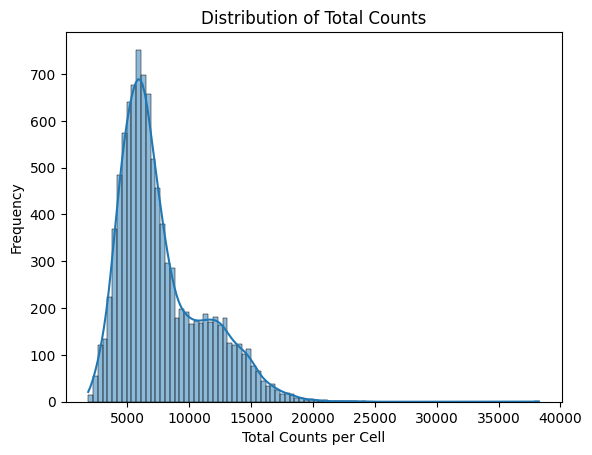

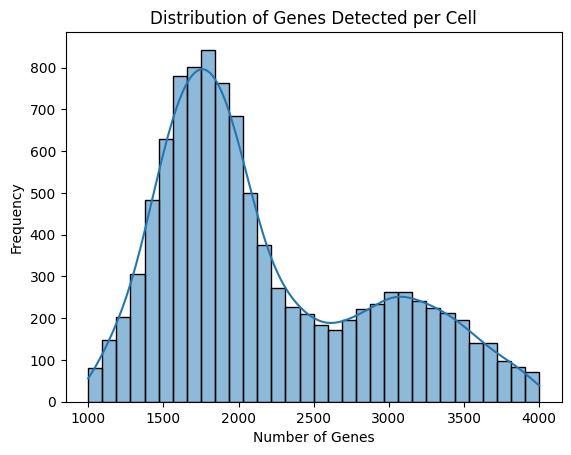

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'total_counts' in adata.obs.columns:
    sns.histplot(adata.obs['total_counts'], kde=True)
    plt.title('Distribution of Total Counts')
    plt.xlabel('Total Counts per Cell')
    plt.ylabel('Frequency')
    plt.show()

if 'n_genes_by_counts' in adata.obs.columns:
    sns.histplot(adata.obs['n_genes_by_counts'], kde=True)
    plt.title('Distribution of Genes Detected per Cell')
    plt.xlabel('Number of Genes')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# For example, saving cell metadata summary to CSV
adata.obs.to_csv('cell_metadata_summary.csv')


Representation of the sparse count matrix. (Output of how the slice of raw count matrix looks like)

In [ ]:
adata.X[:8, 1365:1375].todense()

matrix([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 5., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Feel free to explore the data more if needed...

In [ ]:
type(adata)

anndata._core.anndata.AnnData

In [ ]:
adata.obsm['X_pca']

array([[-8.1876917e+00, -4.6821318e+00, -3.5246642e+00, ...,
         1.9453032e+00,  1.5187016e+00,  3.8041594e+00],
       [ 1.5765428e+01, -1.7717158e+00, -1.6964819e+00, ...,
        -9.3396688e-01, -1.2859090e-01,  5.1628625e-01],
       [-1.0010709e+01, -1.3899180e+01,  2.2678814e+01, ...,
         5.9096986e-01,  3.4848340e+00,  2.7135963e+00],
       ...,
       [-9.5101681e+00, -5.2169461e+00,  9.2831385e-01, ...,
         2.2692181e-01, -2.6684330e+00,  1.2178539e+00],
       [-1.0123443e+01, -4.4491625e+00, -4.2090373e+00, ...,
         5.7210505e-01,  1.6622834e+00, -1.6861050e-01],
       [-9.6909933e+00, -2.6117182e+00, -8.2689772e+00, ...,
        -1.8341672e+00,  5.3223449e-01,  7.0484942e-03]], dtype=float32)

## Embeddings

This step is totally unnecessary for the challenge, however for a better understanding, this is what kind of the output, the embedding model (in our case PCA) returns (this value is just a dummy value based on random numbers, but the output looks exactly like this).

In [ ]:
import numpy as np


EMBEDDING_DIMENSION = 512

embeddings = np.random.random((adata.shape[0], EMBEDDING_DIMENSION))

In [ ]:

embeddings.shape

(10246, 512)

In [ ]:
embeddings[:5]

array([[0.49979086, 0.2689806 , 0.53886944, ..., 0.02040425, 0.1119614 ,
        0.89250728],
       [0.32824924, 0.47578095, 0.42920814, ..., 0.70959307, 0.78508923,
        0.52064791],
       [0.3885322 , 0.17299391, 0.36134574, ..., 0.73097476, 0.63217245,
        0.69973869],
       [0.86349002, 0.72868463, 0.30907659, ..., 0.8016953 , 0.55210423,
        0.96306335],
       [0.68226687, 0.65746   , 0.54526539, ..., 0.59535313, 0.95914572,
        0.33426509]])

## Diving in details with the challenge problem

In [ ]:
!wget https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/neu_broad_challenge_inputs.pkl

--2024-06-07 17:35:49--  https://storage.googleapis.com/dsp-cellarium-cas-public/neu-broad-challenge/neu_broad_challenge_inputs.pkl
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.180.207, 74.125.126.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50054196 (48M) [application/octet-stream]
Saving to: ‘neu_broad_challenge_inputs.pkl’

neu_broad_challenge 100%[===================>]  47.74M  57.8MB/s    in 0.8s    

2024-06-07 17:35:50 (57.8 MB/s) - ‘neu_broad_challenge_inputs.pkl’ saved [50054196/50054196]



In [ ]:
import pickle


with open("./neu_broad_challenge_inputs.pkl", "rb") as f:
    data = pickle.loads(f.read())

In [ ]:
print(len(data['cas_search_output']))

10246


In [ ]:
data.keys()

dict_keys(['cas_search_output', 'cas_search_all_neighbors_info'])

## Nearest Neighbor Search Engine
Here's how the output of nearest neighbor search engine looks like. It represents the query_cell_id (the id that user had for each of the input cell) and all neighbors with the distances from the Nearest Neighbor Search Engine.

In [ ]:
nearest_neighbors = data["cas_search_output"]
nearest_neighbors[0]

{'query_cell_id': 'AAACCCAAGCGCCCAT-1',
 'neighbors': [{'cas_cell_index': 1296050365, 'distance': 0.9412596821784973},
  {'cas_cell_index': 1290040494, 'distance': 0.9352086186408997},
  {'cas_cell_index': 1280046547, 'distance': 0.9350166916847229},
  {'cas_cell_index': 1288030475, 'distance': 0.9347577095031738},
  {'cas_cell_index': 1384039004, 'distance': 0.9340347051620483},
  {'cas_cell_index': 1524030840, 'distance': 0.9334846138954163},
  {'cas_cell_index': 1288073094, 'distance': 0.933451235294342},
  {'cas_cell_index': 1286087458, 'distance': 0.9332631230354309},
  {'cas_cell_index': 1292095003, 'distance': 0.9331009387969971},
  {'cas_cell_index': 1288025170, 'distance': 0.9326092004776001},
  {'cas_cell_index': 1294014990, 'distance': 0.9325372576713562},
  {'cas_cell_index': 1288025655, 'distance': 0.9325371980667114},
  {'cas_cell_index': 1288027118, 'distance': 0.9320809841156006},
  {'cas_cell_index': 1290041315, 'distance': 0.9316831231117249},
  {'cas_cell_index': 129

In [ ]:
len(nearest_neighbors)

10246

In [ ]:
cas_search_all_neighbors_info = data['cas_search_all_neighbors_info']
print("Type of cas_search_all_neighbors_info:", type(cas_search_all_neighbors_info))
print("Preview of cas_search_all_neighbors_info:", cas_search_all_neighbors_info[0])  # Adjust based on actual data type

Type of cas_search_all_neighbors_info: <class 'list'>
Preview of cas_search_all_neighbors_info: {'cas_cell_index': 1524109823, 'cell_type': 'central memory CD8-positive, alpha-beta T cell', 'assay': "10x 3' v3", 'disease': 'normal', 'suspension_type': 'cell', 'tissue': 'blood', 'cell_type_ontology_term_id': 'CL:0000907', 'assay_ontology_term_id': 'EFO:0009922', 'disease_ontology_term_id': 'PATO:0000461', 'tissue_ontology_term_id': 'UBERON:0000178'}


In [ ]:
len(cas_search_all_neighbors_info)

113412

## Cell Metadata

Here is what metdata we store in our database. You can match the cell metadata by `cas_cell_index` and use it for neighborhood context composition. You would need `cell_type` and `cell_type_ontology_term_id` for this task and can ignore other features variables.

In [ ]:
data["cas_search_all_neighbors_info"][0]

{'cas_cell_index': 1524109823,
 'cell_type': 'central memory CD8-positive, alpha-beta T cell',
 'assay': "10x 3' v3",
 'disease': 'normal',
 'suspension_type': 'cell',
 'tissue': 'blood',
 'cell_type_ontology_term_id': 'CL:0000907',
 'assay_ontology_term_id': 'EFO:0009922',
 'disease_ontology_term_id': 'PATO:0000461',
 'tissue_ontology_term_id': 'UBERON:0000178'}

In [ ]:
# Initialize a set to store the cas_cell_index values
index_set = set()

# Initialize a variable to check uniqueness
is_unique = True

# Iterate over the list containing the dictionary entries
for entry in data["cas_search_all_neighbors_info"]:
    # Check if cas_cell_index is already in the set
    if entry['cas_cell_index'] in index_set:
        is_unique = False
        print(f"Duplicate cas_cell_index found: {entry['cas_cell_index']}")
        break  # Optional: stop at first duplicate
    else:
        # Add the cas_cell_index to the set
        index_set.add(entry['cas_cell_index'])

if is_unique:
    print("All cas_cell_index values are unique.")
else:
    print("There are duplicate cas_cell_index values in the data.")


All cas_cell_index values are unique.


In [ ]:
print(len(index_set))

113412


You might potentially need owlready2 to explore the cell ontology graph

In [ ]:
# Uncomment if needed
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.46-cp310-cp310-linux_x86_64.whl size=24087770 sha256=bdc948281415f2a172e3c76b77ebab5cc9bf44604ddff3777c42f61f82e80e81
  Stored in directory: /root/.cache/pip/wheels/bf/6f/ef/35df148baa59fc6b243aca4f101e17aed14b67dc1166b73fe0
Successfully built owlready2


Here is the Cell Ontology OWL file

In [ ]:
cl_owl_path = 'https://github.com/obophenotype/cell-ontology/raw/v2022-09-15/cl.owl'

In [ ]:
from owlready2 import *

# Load the ontology
onto = get_ontology(cl_owl_path).load()
print(type(onto))


<class 'owlready2.namespace.Ontology'>


'\n# Print classes in the ontology\nprint("Classes in the ontology:")\nfor cls in onto.classes():\n    print(cls)\n\n# Print individuals in the ontology\nprint("\nIndividuals in the ontology:")\nfor indiv in onto.individuals():\n    print(indiv)\n\n# Print object properties in the ontology\nprint("\nObject properties in the ontology:")\nfor prop in onto.object_properties():\n    print(prop)\n\n# Print data properties in the ontology\nprint("\nData properties in the ontology:")\nfor prop in onto.data_properties():\n    print(prop)\n'

In [ ]:
print(onto)

get_ontology("http://purl.obolibrary.org/obo/cl.owl#")


In [ ]:
print("Classes in the ontology:")
size=0

for cls in onto.classes():
    print(cls.name)
    size+=1
print(size)


In [ ]:
cls.label

['placental vein']

In [ ]:
cls.name

'UBERON_8480008'

In [ ]:
print("Individuals in the ontology:")
size=0
for ind in onto.individuals():
    print(ind, ind.label)
    size+=1

print(size)


Individuals in the ontology:
0


In [ ]:
print("Object properties in the ontology:")
for obj_prop in onto.object_properties():
    print(obj_prop, obj_prop.label)


In [ ]:
print("Data properties in the ontology:")
for data_prop in onto.data_properties():
    print(data_prop, data_prop.label)


Data properties in the ontology:


In [ ]:
print("Annotations in the ontology:")
for ann in onto.annotation_properties():
    print(ann, ann.label)

In [ ]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
from owlready2 import *
import pygraphviz as pgv
onto = get_ontology(cl_owl_path).load()
graph = onto.get_dot_graph()
graph.write_png("ontology_visualization.png")


TypeError: 'NoneType' object is not callable

# Converting oncology to directed graph

In [44]:
!pip install rdflib networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.0 MB/s eta 0:00:00


In [47]:
import rdflib

def guess_format(owl_file):
    formats = ['xml', 'turtle', 'n3']
    for fmt in formats:
        try:
            g = rdflib.Graph()
            g.parse(owl_file, format=fmt)
            print(f"Successfully parsed with format: {fmt}")
            return fmt
        except Exception as e:
            print(f"Failed to parse with format: {fmt}. Error: {e}")
    print("Could not determine the format of the OWL file.")
    return None

# Example usage
owl_file = 'https://github.com/obophenotype/cell-ontology/raw/v2022-09-15/cl.owl'
detected_format = guess_format(owl_file)
print(f"Detected format: {detected_format}")


Successfully parsed with format: xml
Detected format: xml


In [48]:
import rdflib
import networkx as nx

def create_graph_from_owl(owl_file):
    # Load the ontology using rdflib
    g = rdflib.Graph()

    # Parse the OWL file with explicit format
    g.parse(owl_file, format='xml')  # Change 'xml' to the correct format if needed

    # Create a directed graph using networkx
    graph = nx.DiGraph()

    # Define the RDF and OWL namespaces
    RDF_TYPE = rdflib.RDF.type
    OWL = rdflib.namespace.OWL
    RDFS = rdflib.namespace.RDFS

    # Efficiently add nodes and edges
    for s, p, o in g.triples((None, RDF_TYPE, OWL.Class)):
        graph.add_node(s)

    for s, p, o in g.triples((None, RDFS.subClassOf, None)):
        graph.add_edge(o, s)  # Edge direction: parent -> child

    return graph

# Example usage
owl_file = 'https://github.com/obophenotype/cell-ontology/raw/v2022-09-15/cl.owl'
graph = create_graph_from_owl(owl_file)

# Print the number of nodes and edges
print(f"Graph has {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges")


Graph has 50001 nodes and 47374 edges


AttributeError: module 'networkx' has no attribute 'write_gpickle'

In [51]:
from networkx.readwrite import json_graph
import json
# Convert the graph to a JSON-compatible format
data = json_graph.node_link_data(graph)

# Save the graph to a JSON file
with open('cell_type_hierarchy.json', 'w') as f:
    json.dump(data, f, indent=4)

In [52]:
# Optionally, load the graph back from the JSON file to verify
with open('cell_type_hierarchy.json', 'r') as f:
    loaded_data = json.load(f)
    loaded_graph = json_graph.node_link_graph(loaded_data)

print(f"Loaded graph has {loaded_graph.number_of_nodes()} nodes and {loaded_graph.number_of_edges()} edges")

Loaded graph has 50001 nodes and 47374 edges


In [1]:
import networkx as nx

# Create a cell type hierarchy graph
cell_type_graph = nx.DiGraph()
cell_type_graph.add_edge('Lymphocyte of B lineage', 'B cell')
cell_type_graph.add_edge('B cell', 'Antibody-secreting cell')
cell_type_graph.add_edge('Antibody-secreting cell', 'CD86-positive plasmablast')

# Function to calculate hierarchical distance in an unweighted graph
def hierarchy_distance(cell_type1, cell_type2, graph):
    try:
        return nx.shortest_path_length(graph, source=cell_type1, target=cell_type2)
    except nx.NetworkXNoPath:
        return float('inf')  # No path found

# Example usage
h_distance = hierarchy_distance('CD86-positive plasmablast', 'B cell', cell_type_graph)
print("Hierarchical Distance:", h_distance)


Hierarchical Distance: inf
